In [3]:
from datasets import ImageDataset, SegmentDataset
from preprocessors import LabeledSegmentsCreator,SuperpixelSegmentsCreator
from models import HistogramBaseModel
import config
import numpy as np
import mlflow
# Initialize the image dataset with the specified paths
image_dataset=ImageDataset(dataset_name="raw_bainite_dataset",
                 image_data_path=config.RAW_BAINITE_IMAGE_DATASET_PATH,
                 image_label_data_path=config.RAW_BAINITE_LABEL_DATASET_PATH,
    )
raw_images_df=image_dataset.load_meta_data()
raw_images_df 

,image_path,json_path,martensite_count,bainite_count
0,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,8.0,4.0
1,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,6.0,5.0
2,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,9.0,8.0
3,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,None,NaN,NaN
4,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,None,NaN,NaN
5,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,None,NaN,NaN


In [4]:
raw_images_df = raw_images_df[raw_images_df['json_path'].notnull()]
raw_images_df

,image_path,json_path,martensite_count,bainite_count
0,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,8.0,4.0
1,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,6.0,5.0
2,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,9.0,8.0


In [5]:
# Initialize the segment dataset
segment_dataset = SegmentDataset(dataset_name="raw_bainite_segments",
                                  image_data_path=config.RAW_BAINITE_SEGMENTS_DATASET_PATH,
                                  image_label_data_path=config.RAW_BAINITE_SEGMENTS_LABELS_DATASET_PATH)
# Create the labeled segments
labeled_segments_creator = LabeledSegmentsCreator(input_dataset=image_dataset, output_dataset=segment_dataset)
labeled_segments_creator.create_segments()

Created dir: C:\Users\hallo\Desktop\Bainitu_segmenation\data_labeling\src\results\raw_bainite_segments
Created 5 segments from 6 images.


In [6]:
segment_dataset.load_meta_data()

,image_path,json_path,label
0,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,bainite
1,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,bainite
2,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,bainite
3,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,bainite
4,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,martensite
5,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,martensite
6,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,martensite
7,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,martensite
8,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,martensite
9,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,C:\Users\hallo\Desktop\Bainitu_segmenation\dat...,martensite


In [ ]:
from optimisers.optuna_optimiser.optuna_optimiser import OptunaOptimiser


model_parameters = {
    'n_estimators': {'type': 'int', 'min': 50, 'max': 200},
    'max_depth': {'type': 'int', 'min': 5, 'max': 20},
    'min_samples_split': {'type': 'int', 'min': 2, 'max': 10},
    'min_samples_leaf': {'type': 'int', 'min': 1, 'max': 5},
    'max_features': {'type': 'int', 'min': 1, 'max': 5},   
    'bins': {'type': 'int', 'min': 64, 'max': 256}
}

slic_parameters = {
        "pixels_per_superpixel" : {'type' : 'int', 'min' : 8000, 'max' : 30000},
        "compactness" : {'type' : 'float', 'min' : 0.4, 'max' : 1}, # consider 0.5
        # "min_cluster_size" : {'type' : 'int', 'min' : 30, 'max' : 100},
        "sigma" : {'type' : 'float', 'min' : 0.1, 'max' : 1.5}
}

felzenszwalb_parameters = {
        "scale_ratio" : {'type' : 'float', 'min' : 0.00001, 'max' : 0.00005},
        "min_size" : {'type' : 'int', 'min' : 10, 'max' : 100},
        "sigma" : {'type' : 'float', 'min' : 0.1, 'max' : 1.5}
}


optuna_optimiser = OptunaOptimiser(src_segment_dataset=segment_dataset, segmentation="felzenszwalb", n_trials=3,
                                   model_hyperparameters=model_parameters, segmentation_parameters = felzenszwalb_parameters, maximize=True, metric_name='f1', experiment_name="Felzenszwalb_adj_min")

c:\Users\hallo\Desktop\Bainitu_segmenation\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025/10/18 17:01:26 INFO mlflow.tracking.fluent: Experiment with name 'Felzenszwalb_adj_min72328ba5-00c6-43e1-b7bc-10f472d8d81b' does not exist. Creating a new experiment.


In [8]:
optuna_optimiser.optimise()

[I 2025-10-18 17:01:26,168] A new study created in memory with name: no-name-7a730868-d7be-4d44-bd29-46a60956956f


Created dir: C:\Users\hallo\Desktop\Bainitu_segmenation\data_labeling\src\results\felzenszwalb_bf96547b1c6d
Proposed scale  0.0  Proposed min_size  51
Proposed scale  0.0  Proposed min_size  23
Proposed scale  0.0  Proposed min_size  171
Proposed scale  0.0  Proposed min_size  893
Proposed scale  0.0  Proposed min_size  57
Proposed scale  0.0  Proposed min_size  12
Proposed scale  0.0  Proposed min_size  9
Proposed scale  0.0  Proposed min_size  132
Proposed scale  0.0  Proposed min_size  369
Proposed scale  0.0  Proposed min_size  104
Proposed scale  0.0  Proposed min_size  190
Proposed scale  0.0  Proposed min_size  1
Proposed scale  0.0  Proposed min_size  43
Proposed scale  0.0  Proposed min_size  148
Proposed scale  0.0  Proposed min_size  103
Proposed scale  0.0  Proposed min_size  96
Proposed scale  0.0  Proposed min_size  351
Proposed scale  0.0  Proposed min_size  105


[W 2025-10-18 17:04:32,700] Trial 0 failed with parameters: {'n_estimators': 96, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 1, 'bins': 84, 'scale_ratio': 3.4227958411994085e-05, 'min_size_ratio': 0.0005084831954341136, 'sigma': 0.3391552561267773} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\hallo\Desktop\Bainitu_segmenation\venv\lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
  File "c:\Users\hallo\Desktop\Bainitu_segmenation\experiment_platform\backend\experiment_platform_backend\optimisers\optuna_optimiser\optuna_optimiser.py", line 122, in objective
    self.prepare_segments(segmentation_params)
  File "c:\Users\hallo\Desktop\Bainitu_segmenation\experiment_platform\backend\experiment_platform_backend\optimisers\optuna_optimiser\optuna_optimiser.py", line 88, in prepare_segments
    self.segment_creator.create_segments(segmentation_

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import io
from PIL import Image
def plot_confusion_matrix(cm, labels):

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)

    # Convert buffer to a PIL Image for MLflow
    img = Image.open(buf)
    return img


img=plot_confusion_matrix(cm, labels)
img.show()


In [ ]:
segment_dataset = SegmentDataset(dataset_name="slic_00e6a9d78e98",
                                  image_data_path=config.SUPERPIXEL_BAINITE_SEGMENTS_DATASET_PATH,
                                  image_label_data_path=config.SUPERPIXEL_BAINITE_SEGMENTS_DATASET_PATH)
# Create the labeled segments
labeled_segments_creator = LabeledSegmentsCreator(input_dataset=image_dataset, output_dataset=segment_dataset)
labeled_segments_creator.create_segments()

In [11]:
import numpy as np

data = np.random.randn(10)
print(data)

hist, bin_edges = np.histogram(data, bins=10)
print(hist)
print(bin_edges)


[ 1.34027258 -0.56267623 -0.90456764 -1.00884175  0.1020773  -0.01673682
 -0.4815399  -0.45482617 -0.01835586 -1.3257854 ]
[1 2 1 2 2 1 0 0 0 1]
[-1.3257854  -1.0591796  -0.79257381 -0.52596801 -0.25936221  0.00724359
  0.27384939  0.54045518  0.80706098  1.07366678  1.34027258]


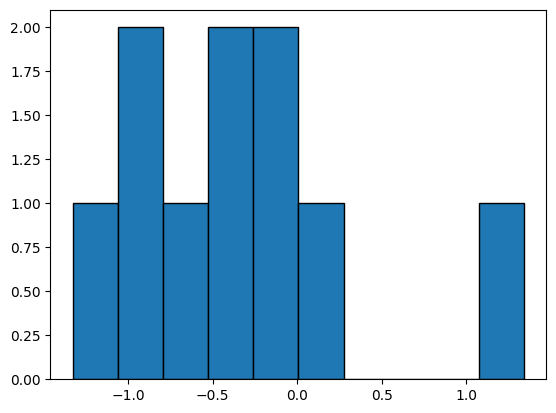

In [12]:
import matplotlib.pyplot as plt

plt.hist(data, bins=10, edgecolor='black')
plt.show()


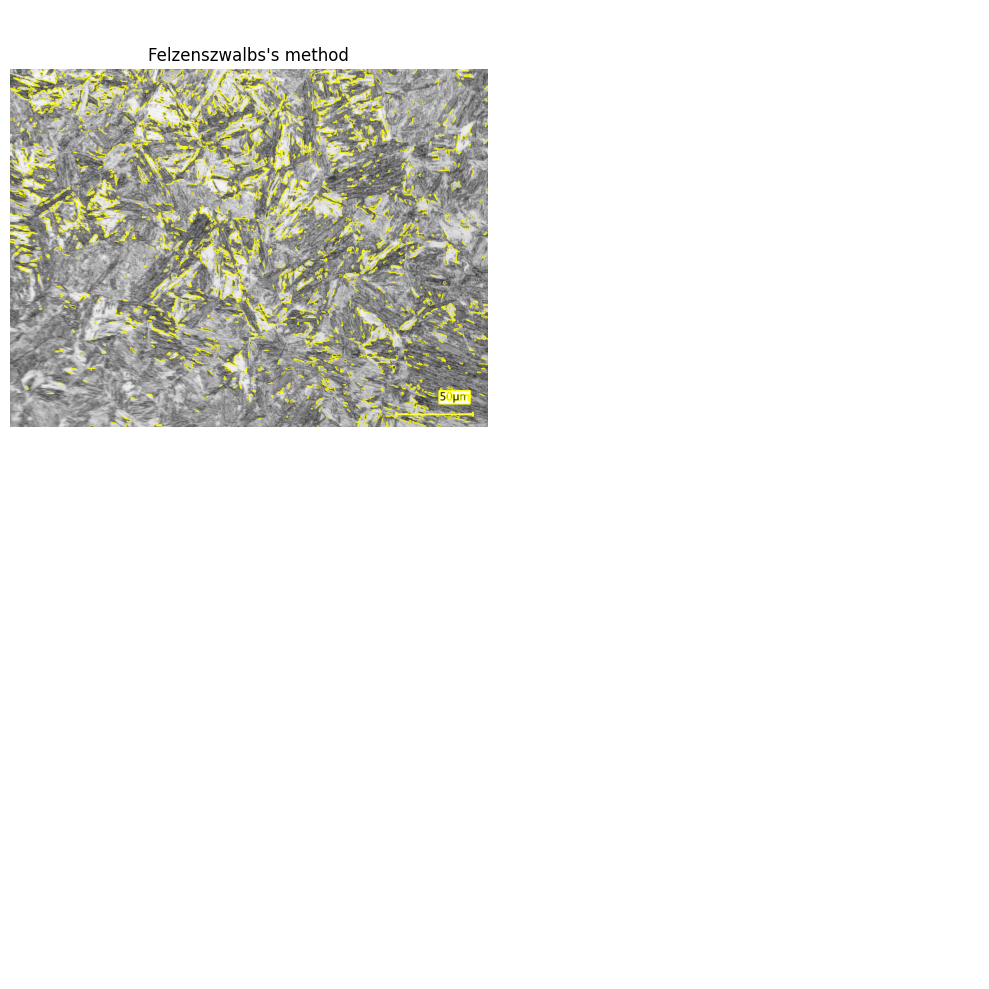

In [11]:
import cv2
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\hallo\Desktop\Bainitu_segmenation\data_labeling\src\raw_images\797-DQ-full_1000x-1.tif")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Convert to float for segmentation (values between 0 and 1) TODO ???
img_float = img_as_float(gray)
segments = felzenszwalb(
    img_float,
    scale=800,
    #sigma=1,
)
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img_float, segments))
ax[0, 0].set_title("Felzenszwalbs's method")

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()